#### The goal of this problem is to implement your own version of logistic regression, and compare it to the output of the Python package.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### (a) Load the data file *BinaryData.csv* and perform a simple logistic regression in the programming language of your choice, predicting the class y based on x. Report the values of $\beta_0$ and $\beta_1$.

= = = = = = = = = = = Coefficient = = = = = = = = = = =
β0: -0.7775994625128763 , β1: 1.2088079596901309


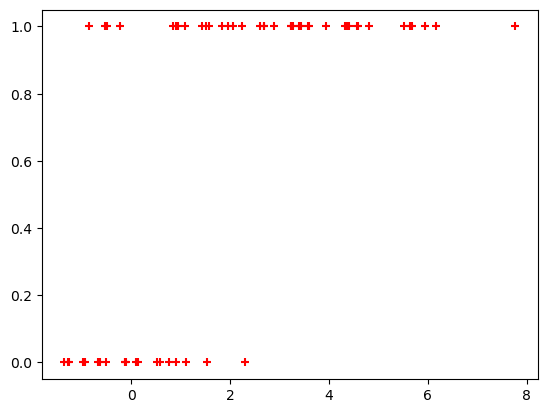

In [10]:
data = pd.read_csv('BinaryData.csv')
plt.scatter(data.x, data.y, marker='+', color='red')
# print(data)
X_train = pd.DataFrame({'intercept': np.ones(data.shape[0]), 'x': data['x']})
# print(X_train)
y_train = (data.y == 1)
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
print("= = = = = = = = = = = Coefficient = = = = = = = = = = =")
beta_0, beta_1 = results.params.intercept, results.params.x
print("β0:", beta_0, ", β1:", beta_1)

#### (b) Now lets work on implementing our own version of logistic regression, and understand its basics. To start, consider the function <br><br> $f(z) = \alpha log (1 + e^{-z}) + (1 - \alpha) log (1 + e^z)$ , $0 ≤ \alpha ≤ 1$,<br><br>where $\alpha$ is a known coefficient between 0 and 1. Show that $z = log( \alpha )$ is a stationary point (point of zero derivative of $f(z)$.

In [11]:
from sympy import symbols, log, diff, solve, E

# Define the symbols
z = symbols('z')
alpha = symbols('alpha', real=True, positive=True)

# Define the function f(z)
f_z = alpha * log(1 + E**(-z)) + (1 - alpha) * log(1 + E**z)

# Compute the derivative of f(z) with respect to z
f_z_derivative = diff(f_z, z)

# Solve the derivative equal to zero to find the stationary points
stationary_points = solve(f_z_derivative, z)
stationary_points

[log(-alpha/(alpha - 1))]

#### (c) Show that $f(z)$ is convex (the second derivative test might be the easiest).

#### (d) Now that you know $f(z)$ is convex, is $z = log( \frac{\alpha}{1 - \alpha}$ ) a minimizer or a maximizer? Why?

#### (e) Plot $f(z)$ for $\alpha$ = 0.3, and the values of z between -3 and 3.

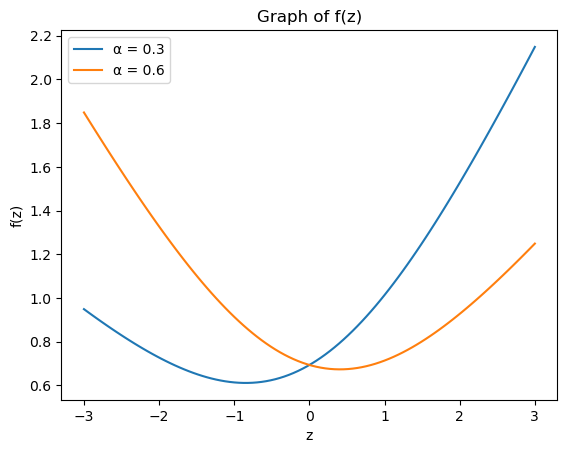

In [12]:
# f(z)
def f(z, alpha):
    return alpha * np.log(1 + np.exp(-z)) + (1 - alpha) * np.log(1 + np.exp(z))

# Generate a range of z values
z_values = np.linspace(-3, 3, 100)
# plt.figure(figsize=(10, 6))
plt.plot(z_values, f(z_values, 0.3), label=f'α = 0.3')
plt.plot(z_values, f(z_values, 0.6), label=f'α = 0.6')
plt.title('Graph of f(z)')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.legend()
plt.show()

#### (f) In the class we learned that sum of convex functions is convex. Furthermore, we showed that if $f(z)$ is convex, $f(\beta_0 + \beta_1x)$ is also convex. This is an indication that the logistic loss <br><br> $L(\beta_0,\beta_1) = \sum_{i=1}^{n} y_i log (1+e^{-\beta_0-\beta_1x_i}) + (1-y_i)log(1+e^{\beta_0+\beta_1x_i})$<br><br>is convex. Now, derive an expression for<br><br>$\frac{\partial L}{\partial \alpha} = ...$, $\frac{\partial L}{\partial \beta} = ...$<br><br>Simplify the expressions in a way that the end results only involve sigmoid functions and not the log or exp functions. Expressions like $\sum_{i=1}^{n} \omega_i\;sigmoid(\omega_i')+\omega_i''$, where $\omega_i, \omega_i', \omega_i''$ are expressions in terms of the problem parameters.

#### (g) Use the data file BinaryData.csv in part (a) and set up L(β0,β1) for the xi and yi in the dataset.<br>Write a gradient descent (GD) scheme to minimize $L(β_0, β_1)$ in Matlab or Python. For your scheme use a learning rate of $η = 0.01$, and run the GD for 500 iterations. As the initial values for $β_0$ and $\beta_1$ you can use zero (clearly, since the problem is convex, the initialization does not matter and we will converge to the global minimizer no matter where we start). Attach all your code and results.